In [5]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import statistics

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

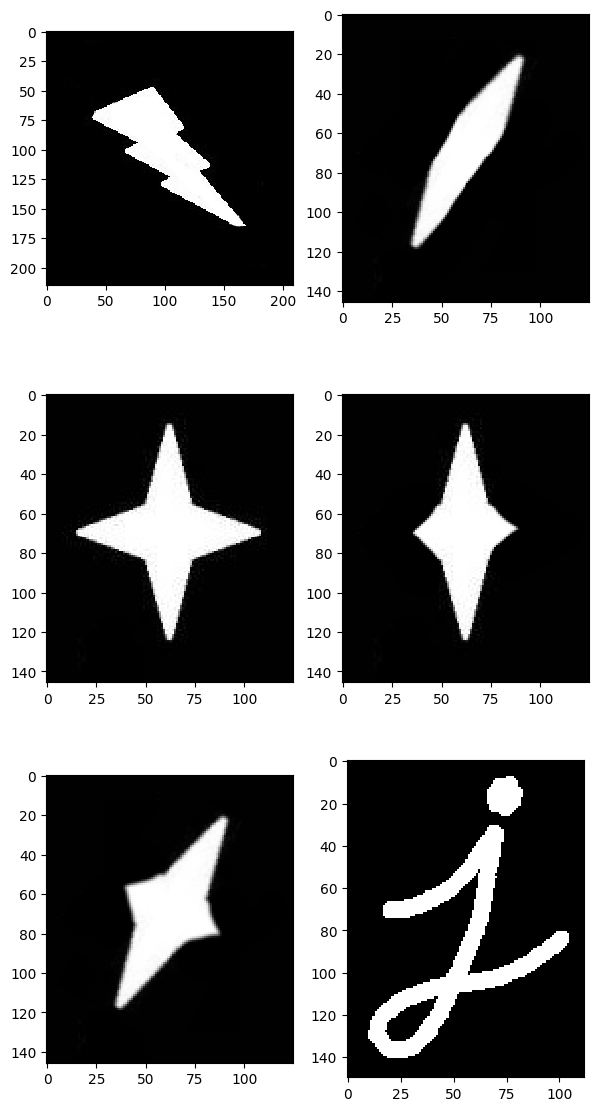

In [10]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [11]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [12]:
# 255

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


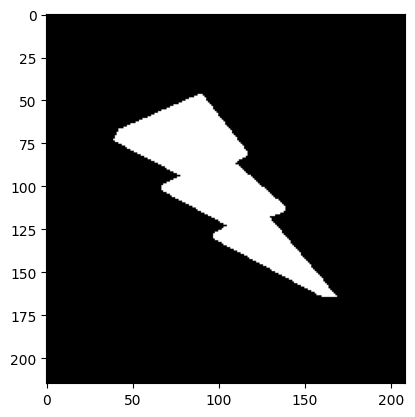

In [16]:
_, lightningbolt = cv2.threshold(lightningbolt,200,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [40]:
# 

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

(215, 209)
(215, 209)


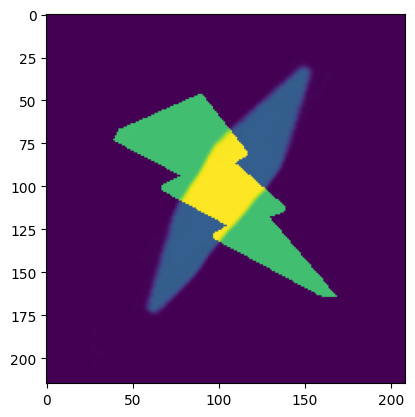

In [26]:
blobresize = cv2.resize(blob, (lightningbolt.shape[1], lightningbolt.shape[0]))
print(blobresize.shape)
print(lightningbolt.shape)
dst = cv2.addWeighted(lightningbolt, 0.7, blobresize, 0.3, 0)
plt.imshow(dst)

## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

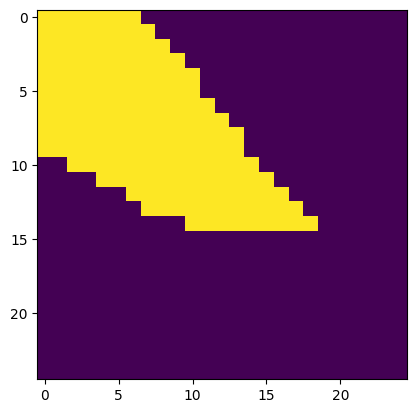

In [28]:
px = lightningbolt[150:175, 150:175]
plt.imshow(px)

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

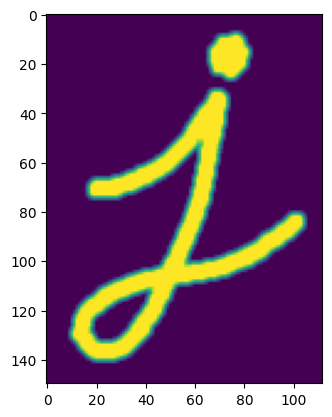

In [31]:
blur = cv2.blur(letterj, (3,3))
plt.imshow(blur)

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

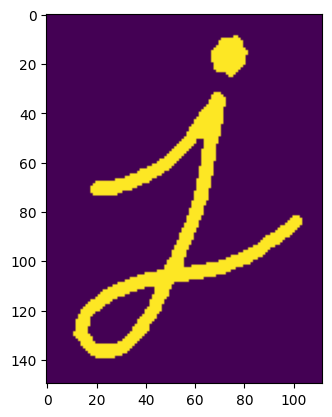

In [32]:
kernel = np.ones((3,3), np.uint8)
erosions = cv2.erode(letterj, kernel, iterations=1)
plt.imshow(erosions)

## 5. Perform erosion on j with a 5x5 kernel

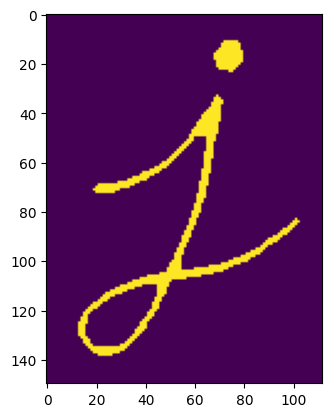

In [33]:
kernel = np.ones((5,5), np.uint8)
erosions = cv2.erode(letterj, kernel, iterations=1)
plt.imshow(erosions)

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



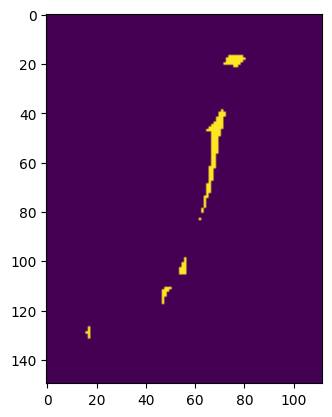

In [34]:
kernel = np.ones((4,2), np.uint8)
erosions = cv2.erode(letterj, kernel, iterations=4)
plt.imshow(erosions)

## 7. Perform dilation on j with a 3x3 kernel

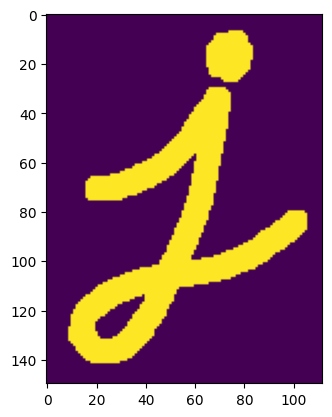

In [35]:
kernel = np.ones((3,3), np.uint8)
erosions = cv2.dilate(letterj, kernel, iterations=1)
plt.imshow(erosions)

## 8. Perform dilation on j with a 5x5 kernel

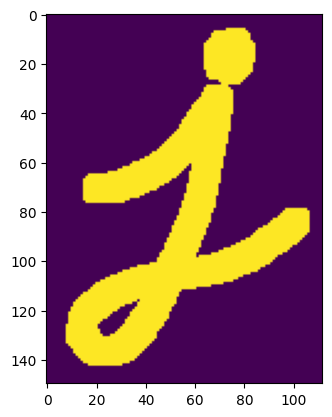

In [36]:
kernel = np.ones((5,5), np.uint8)
erosions = cv2.dilate(letterj, kernel, iterations=1)
plt.imshow(erosions)

## 9. What is the effect of kernel size on morphology operations?

In [49]:
# The bigger the kernel size, the bigger the j becomes

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

In [50]:
# More iterations lead to a stronger effect, more is likeley to be erroded then a large kernel

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

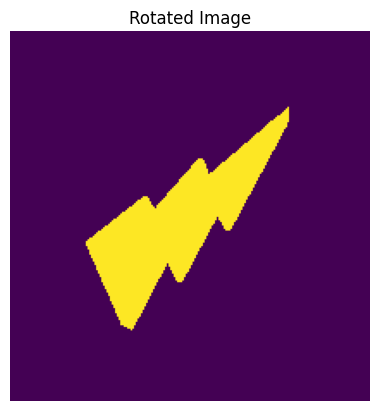

In [37]:
rows, cols = lightningbolt.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(lightningbolt, M, (cols, rows))

plt.imshow(dst)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

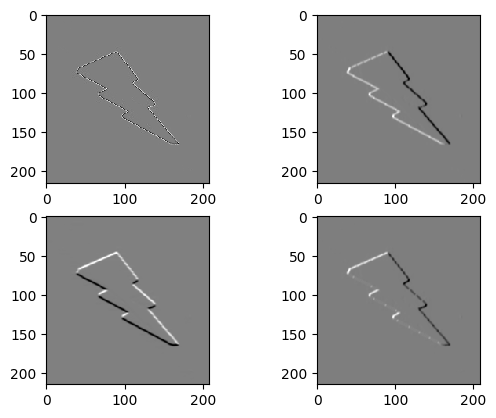

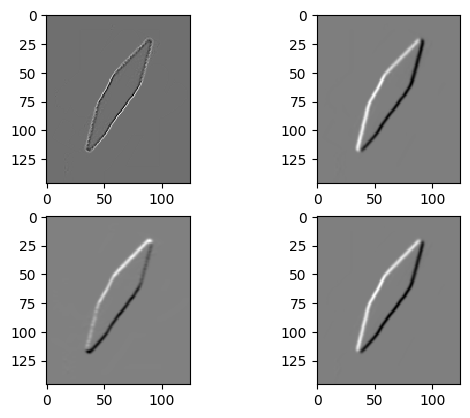

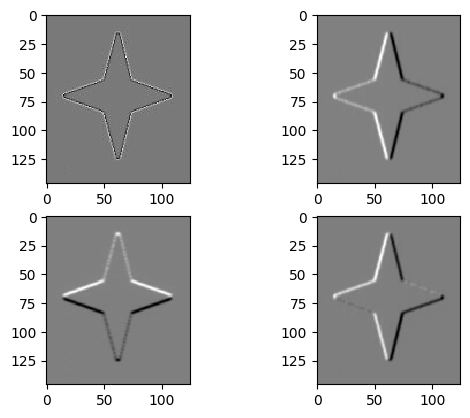

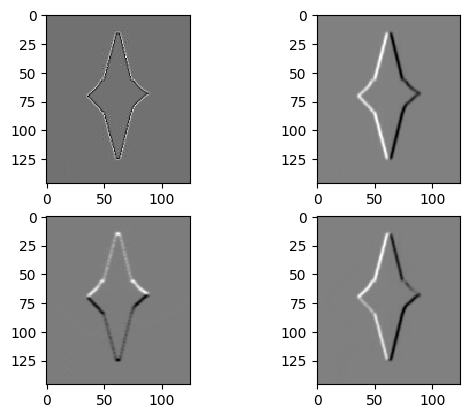

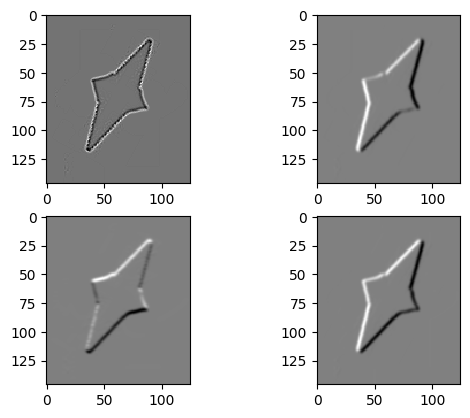

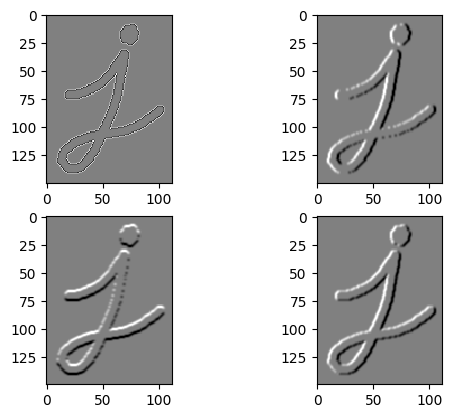

In [43]:
for image in images:
    fig,ax = plt.subplots(nrows=2, ncols=2)
    laplacian = cv2.Laplacian(image,cv2.CV_64F)
    sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
    dst = cv2.addWeighted(sobelx, 0.7, sobely, 0.3, 0)
    j = ax.flatten()
    j[0].imshow(laplacian, cmap='gray', interpolation='none');
    j[1].imshow(sobelx, cmap='gray', interpolation='none');
    j[2].imshow(sobely, cmap='gray', interpolation='none');
    j[3].imshow(dst, cmap='gray', interpolation='none');

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 